Leemos y filtramos el dataset

In [47]:

import dask.dataframe as dd
import numpy as np

In [48]:


# Cargar el conjunto de datos en un dataframe de Dask
df = dd.read_csv('air_traffic_data.csv')

# Eliminar registros duplicados
df_air_filt = df.drop_duplicates()

# Filtrar filas con valores faltantes en columnas específicas

# Volcar los resultados en un archivo CSV
df_air_filt.to_csv('archivo_sin_duplicados.csv', index=False)


['c:\\Users\\Angel Martínez\\Documents\\GitHub\\Air_Trafic\\archivo_sin_duplicados.csv\\0.part']

In [49]:
df_air_filt.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [50]:
# Conteo de valores perdidos/faltantes  
df_air_filt.isna().sum()

Dask Series Structure:
npartitions=1
Activity Period    int64
Year                 ...
dtype: int64
Dask Name: dataframe-sum-agg, 6 tasks

In [51]:
df_air_filt.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 16 entries, Activity Period to Month
dtypes: object(12), int64(4)

In [52]:
# Consultamos el tipo de datos
df_air_filt.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

In [53]:
df_air_filt.dtypes[df_air_filt.dtypes=='object']

Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Adjusted Activity Type Code    object
Month                          object
dtype: object

In [54]:
columnas_drop= ["Adjusted Passenger Count",
                "GEO Summary",
               
                "Adjusted Activity Type Code",
                "Operating Airline IATA Code",
                "Operating Airline IATA Code",
                "Published Airline IATA Code",
                "Published Airline"
                ]

In [55]:
df_air_filt= df_air_filt.drop(columns=columnas_drop)

In [56]:

valores_unicos = df_air_filt['Terminal'].unique().compute()


print(valores_unicos)

0       Terminal 1
1    International
2       Terminal 3
3            Other
4       Terminal 2
Name: Terminal, dtype: object


In [57]:

Terminal_numeros = {
    'Terminal 1': 1,
    'Terminal 2': 2,
    'Terminal 3': 3,
    'Internacional':4
}


df_air_filt["Terminal"]=df_air_filt["Terminal"].map(Terminal_numeros)
print(df_air_filt["Terminal"].head())


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Terminal, dtype: float64


In [58]:
df_air_filt.dtypes[df_air_filt.dtypes=='object']

Operating Airline      object
GEO Region             object
Activity Type Code     object
Price Category Code    object
Boarding Area          object
Month                  object
dtype: object

In [59]:

meses_numeros = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
df_air_filt["Month"]=df_air_filt["Month"].map(meses_numeros)
print(df_air_filt["Month"].tail())

15002    3
15003    3
15004    3
15005    3
15006    3
Name: Month, dtype: int64


In [60]:
valores_unicos = df_air_filt['Boarding Area'].unique().compute()


print(valores_unicos)

0        B
1        G
2        A
3        E
4        C
5        F
6    Other
7        D
Name: Boarding Area, dtype: object


In [61]:

boarding_area = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F':6,
    'G':7
    
    }
df_air_filt["Boarding Area"]=df_air_filt["Boarding Area"].map(boarding_area)
df_air_filt["Boarding Area"].head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Boarding Area, dtype: float64

In [62]:
valores_unico = df_air_filt['GEO Region'].unique().compute()


print(valores_unico)

0                     US
1                 Canada
2                   Asia
3                 Europe
4    Australia / Oceania
5                 Mexico
6        Central America
7            Middle East
8          South America
Name: GEO Region, dtype: object


In [63]:
valores= {
    'US':1,
    'Canada':2,
    'Asia': 3,
    'Australia / Oceania': 4,
    'Mexico': 5,
    'Central America':6,
    'Middle East':7,
    'South America':8
    }
df_air_filt["GEO Region"]=df_air_filt["GEO Region"].map(valores)
print(df_air_filt["GEO Region"].head())

0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
Name: GEO Region, dtype: float64


In [64]:
valores_unico = df_air_filt['Price Category Code'].unique().compute()


print(valores_unico)

0    Low Fare
1       Other
Name: Price Category Code, dtype: object


In [65]:
valores= {
    'Low Fare':0,
    'Other':1
    }
df_air_filt["Price Category Code"]=df_air_filt["Price Category Code"].map(valores)
print(df_air_filt["Price Category Code"].head())

0    0
1    0
2    0
3    1
4    1
Name: Price Category Code, dtype: int64


In [66]:
df_air_filt["Operating Airline"].head()

0    ATA Airlines
1    ATA Airlines
2    ATA Airlines
3     Air Canada 
4     Air Canada 
Name: Operating Airline, dtype: object

In [67]:
valores_unicos = df_air_filt['Operating Airline'].unique().compute()


print(valores_unicos)

0            ATA Airlines
1             Air Canada 
2               Air China
3              Air France
4         Air New Zealand
             ...         
72         Etihad Airways
73         China Southern
74       Turkish Airlines
75    COPA Airlines, Inc.
76      Air India Limited
Name: Operating Airline, Length: 77, dtype: object


In [68]:
valores_unicos=df_air_filt["Operating Airline"].unique().compute()

valor_int=np.arange(len(valores_unicos))
valor_dict=dict(zip(valores_unicos, valor_int))

df_air_filt["Operating Airline"]=df_air_filt["Operating Airline"].map(lambda x: valor_dict.get(x,np.nan),meta=(columna, 'int64'))

NameError: name 'columna' is not defined

In [ ]:
valores_unicos = df_air_filt['Activity Type Code'].unique().compute()


print(valores_unicos)

0          Deplaned
1          Enplaned
2    Thru / Transit
Name: Activity Type Code, dtype: object


In [ ]:
valores= {
    'Deplaned':1,
    'Enplaned':2,
    'Thru / Transit': 3,
    }
df_air_filt["Activity Type Code"]=df_air_filt["Activity Type Code"].map(valores)
print(df_air_filt["Activity Type Code"].head())

0    1
1    2
2    3
3    1
4    2
Name: Activity Type Code, dtype: int64


In [ ]:
suma_nulos = df_air_filt.isnull().sum()
print(suma_nulos)
suma_nulos_resultado = suma_nulos.compute()
print(suma_nulos_resultado)

Dask Series Structure:
npartitions=1
Activity Period    int64
Year                 ...
dtype: int64
Dask Name: dataframe-sum-agg, 28 tasks
Activity Period           0
Operating Airline         0
GEO Region             2089
Activity Type Code        0
Price Category Code       0
Terminal               9224
Boarding Area            27
Passenger Count           0
Year                      0
Month                     0
dtype: int64


In [ ]:
df_air_filt2 = df_air_filt[df_air_filt['Terminal'].notnull() & df_air_filt['Boarding Area'].notnull()]
df_air_filt2.head()

,Activity Period,Operating Airline,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,200507,0,1.0,1,0,1.0,2.0,27271,2005,7
1,200507,0,1.0,2,0,1.0,2.0,29131,2005,7
2,200507,0,1.0,3,0,1.0,2.0,5415,2005,7
3,200507,1,2.0,1,1,1.0,2.0,35156,2005,7
4,200507,1,2.0,2,1,1.0,2.0,34090,2005,7


In [ ]:
suma_nulos = df_air_filt2.isnull().sum()
print(suma_nulos)
suma_nulos_resultado = suma_nulos.compute()
print(suma_nulos_resultado)

Dask Series Structure:
npartitions=1
Activity Period    int64
Year                 ...
dtype: int64
Dask Name: dataframe-sum-agg, 34 tasks
Activity Period        0
Operating Airline      0
GEO Region             0
Activity Type Code     0
Price Category Code    0
Terminal               0
Boarding Area          0
Passenger Count        0
Year                   0
Month                  0
dtype: int64


Media y desviacion tipica

In [ ]:
media = df_air_filt2.mean().compute()
desviacion_estandar = df_air_filt2.std().compute()
print("Media:")
print(media)
print("\nDesviación estándar:")
print(desviacion_estandar)

Media:
Activity Period        201004.520837
Operating Airline          29.033028
GEO Region                  1.268546
Activity Type Code          1.644821
Price Category Code         0.782812
Terminal                    1.823102
Boarding Area               3.709666
Passenger Count         55944.645686
Year                     2009.979768
Month                       6.544008
dtype: float64

Desviación estándar:
Activity Period          308.340649
Operating Airline         15.432274
GEO Region                 0.731742
Activity Type Code         0.634321
Price Category Code        0.412367
Terminal                   0.955426
Boarding Area              1.623586
Passenger Count        85530.707364
Year                       3.087691
Month                      3.473339
dtype: float64


In [ ]:


# Calcular la correlación entre todas las columnas
correlacion = df_air_filt.corr().compute()

# Obtener las 10 columnas más correlacionadas
columnas_seleccionadas = correlacion.unstack().sort_values(ascending=False)[:11]
elementos_clave = columnas_seleccionadas.index.tolist()

# Filtrar las repeticiones consigo mismas y otro orden
elementos_clave_sin_repeticiones = set()
for elemento in elementos_clave:
    if elemento[0] != elemento[1]:
        elementos_clave_sin_repeticiones.add((min(elemento), max(elemento)))

# Convertir el conjunto a una lista
elementos_clave_sin_repeticiones = list(elementos_clave_sin_repeticiones)

# Imprimir los elementos clave sin repeticiones de columna consigo misma
print("\nElementos clave sin repeticiones de columna consigo misma:")
print(elementos_clave_sin_repeticiones)





Elementos clave sin repeticiones de columna consigo misma:
[('Activity Period', 'Year')]


In [ ]:
# Generar la lista de features y la variable target
target = 'Price Category Code'
features = [x for x in df_air_filt2.columns if x!=target]

print(target)
print(features)

Price Category Code
['Activity Period', 'Operating Airline', 'GEO Region', 'Activity Type Code', 'Terminal', 'Boarding Area', 'Passenger Count', 'Year', 'Month']


In [ ]:
# Importar el algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeRegressor

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_air_filt2[features], y=df_air_filt2[target])

DecisionTreeRegressor(max_depth=19, random_state=100)

In [ ]:
y_pred_arbol = arbol_importancia.predict(X=df_air_filt2[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_air_filt2[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_air_filt2[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_air_filt2[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_air_filt2[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_air_filt2[target], y_pred_arbol))

Mean Absolute Error: 0.000403481468672546
Mean Absolute Percentage Error: 90855949598228.94
Mean Squared Error: 0.000201740734336273
Root Mean Squared Error: 0.014203546540785967
R^2 coefficient of determination: 0.9988134122840218


In [ ]:
arbol_importancia.feature_importances_

array([1.58058395e-02, 6.66527496e-01, 8.90803910e-02, 3.62056344e-04,
       2.12992658e-02, 5.40372720e-03, 1.86989344e-01, 7.26936077e-03,
       7.26251896e-03])

In [ ]:

import pandas as pd


# Convertir a DataFrame de pandas
df = pd.DataFrame({'Importancia': arbol_importancia.feature_importances_}, index=features)

# Crear un Dask DataFrame a partir del DataFrame de pandas
importancia = dd.from_pandas(df, npartitions=1)

# Ordenar los datos
importancia = importancia.sort_values(by='Importancia', ascending=False)

importancia.compute()


,Importancia
Operating Airline,0.666527
Passenger Count,0.186989
GEO Region,0.089080
Terminal,0.021299
Activity Period,0.015806
Year,0.007269
Month,0.007263
Boarding Area,0.005404
Activity Type Code,0.000362


In [ ]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()
importancia.compute()

,Importancia,imp_acum
Operating Airline,0.666527,0.666527
Passenger Count,0.186989,0.853517
GEO Region,0.089080,0.942597
Terminal,0.021299,0.963896
Activity Period,0.015806,0.979702
Year,0.007269,0.986972
Month,0.007263,0.994234
Boarding Area,0.005404,0.999638
Activity Type Code,0.000362,1.000000


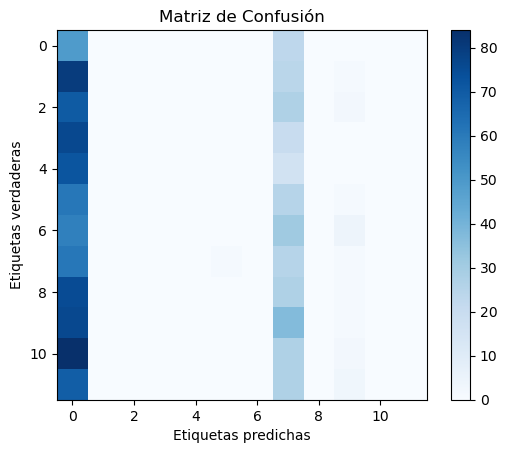

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame de Dask
df = dd.read_csv('c:\\Users\\Angel Martínez\\Documents\\GitHub\\Air_Trafic\\air_traffic_data_limpio.csv\\0.part').compute()

# Convertir los DataFrames de Dask a matrices NumPy
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

# Dividir las matrices de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar un modelo de regresión logística utilizando scikit-learn
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión utilizando scikit-learn
confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.imshow(confusion, cmap='Blues')
plt.colorbar()

# Etiquetas de los ejes
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')

# Títulos de los ejes
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()
